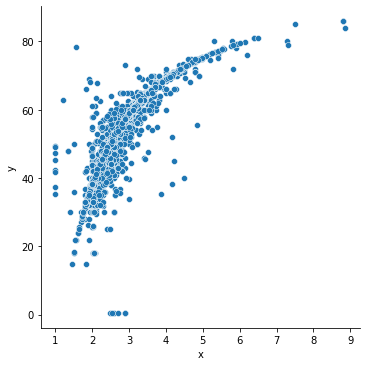

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_excel('D:\\学业\\大二\\数据挖掘\\antibody.xlsx')
data=df.iloc[:,5:7]
data=pd.DataFrame(data)
data.columns=['x','y']
sns.relplot(x="x",y="y",data=data)

噪声比: 0.62%
分簇的数目: 3
轮廓系数: 0.502


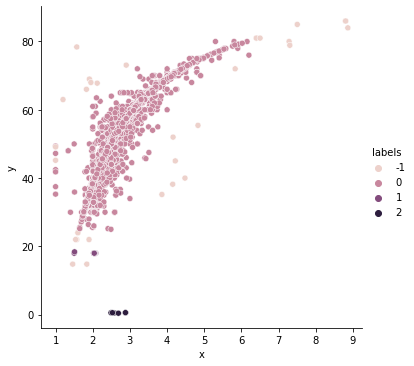

In [2]:
#建立DBSCAN模型
db = DBSCAN(eps=1, min_samples=5).fit(data) 
data['labels'] = db.labels_ 
labels = db.labels_
raito = data.loc[data['labels']==-1].x.count()/data.x.count() 
print('噪声比:', format(raito, '.2%'))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
print('分簇的数目: %d' % n_clusters_)
print("轮廓系数: %0.3f" % metrics.silhouette_score(data, labels))
sns.relplot(x="x",y="y", hue="labels",data=data)


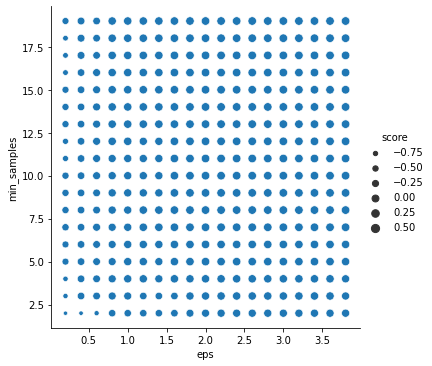

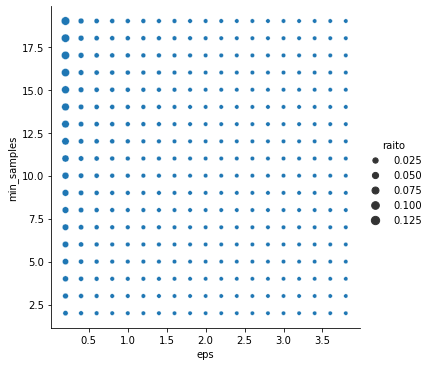

In [3]:
#调参
rs= []
eps = np.arange(0.2,4,0.2) 
min_samples=np.arange(2,20,1)

best_score=0
best_score_eps=0
best_score_min_samples=0

for i in eps:
    for j in min_samples:
        try:
            db = DBSCAN(eps=i, min_samples=j).fit(data)
            labels= db.labels_
            k=metrics.silhouette_score(data,labels) 
            raito = len(labels[labels[:] == -1]) / len(labels) 
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
            rs.append([i,j,k,raito,n_clusters_])
            if k>best_score:
                best_score=k
                best_score_eps=i
                best_score_min_samples=j
        except:
            db='' 
else:
            db=''
rs= pd.DataFrame(rs)
rs.columns=['eps','min_samples','score','raito','n_clusters']
sns.relplot(x="eps",y="min_samples", size='score',data=rs)
sns.relplot(x="eps",y="min_samples", size='raito',data=rs)

噪声比: 0.25%
分簇的数目: 2
轮廓系数: 0.636


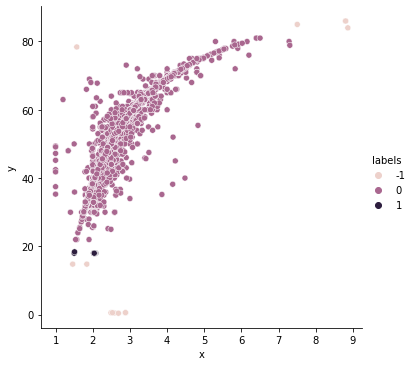

In [11]:
db = DBSCAN(eps=3, min_samples=16).fit(data)
data['labels'] = db.labels_ 
labels = db.labels_
raito = data.loc[data['labels']==-1].x.count()/data.x.count() 
print('噪声比:', format(raito, '.2%'))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
print('分簇的数目: %d' % n_clusters_)
print("轮廓系数: %0.3f" % metrics.silhouette_score(data, labels)) 
sns.relplot(x="x",y="y", hue="labels",data=data)